# 4.3 Statistical analysis of results from notebooks 4.0-4.2
## Data cleaning

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [12]:
g1_diff = pd.read_csv('../data/game1_results.csv')
g2_diff = pd.read_csv('../data/game2_results.csv')
g3_diff = pd.read_csv('../data/game3_results.csv')

In [13]:
g2_diff = g2_diff.dropna(subset=['diff_magnitude'])
g3_diff = g3_diff.dropna(subset=['diff_magnitude'])

In [14]:
g1_diff['label'] = 'G1'
g2_diff['label'] = 'G2'
g3_diff['label'] = 'G3'

In [15]:
g1_diff = g1_diff.drop(['customer_id'], axis=1)
g2_diff = g2_diff.drop(['customer_id'], axis=1)
g3_diff = g3_diff.drop(['customer_id'], axis=1)

In [16]:
anova_df = g1_diff.append(g2_diff, ignore_index=True)
anova_df = anova_df.append(g3_diff, ignore_index=True)
delta_df = anova_df.drop('diff_magnitude', axis=1)
magnitude_df = anova_df.drop('diff_delta12', axis=1)
delta_df

,diff_delta12,label
0,0.028825,G1
1,-0.001590,G1
2,0.001741,G1
3,-0.002134,G1
4,-0.001005,G1
...,...,...
2240,0.009248,G3
2241,-0.001945,G3
2242,-0.009993,G3
2243,0.010198,G3


In [17]:
magnitude_df

,diff_magnitude,label
0,0.453332,G1
1,0.349175,G1
2,-0.070467,G1
3,0.135152,G1
4,-0.109423,G1
...,...,...
2240,0.202163,G3
2241,0.247644,G3
2242,0.286097,G3
2243,0.028846,G3


## Visualization

In [20]:
delta_df_uns = delta_df.pivot(columns='label', values='diff_delta12')
delta_df_uns.describe()

label,G1,G2,G3
count,804.000000,753.000000,688.000000
mean,0.003243,-0.000503,0.000259
std,0.011522,0.009636,0.010498
min,-0.052285,-0.040500,-0.048392
25%,-0.004560,-0.006312,-0.005709
50%,0.002111,-0.000430,0.000427
75%,0.009785,0.005357,0.006280
max,0.048282,0.032217,0.038090


In [21]:
magnitude_df_uns = magnitude_df.pivot(columns='label', values='diff_magnitude')
magnitude_df_uns.describe()

label,G1,G2,G3
count,804.000000,753.000000,688.000000
mean,0.081721,-0.011380,0.130275
std,0.177943,0.164395,0.185882
min,-0.571191,-0.637185,-0.266775
25%,-0.029410,-0.114491,0.015555
50%,0.078449,-0.020552,0.115677
75%,0.189194,0.083675,0.214177
max,1.192667,1.059989,1.471113


Text(0.5, 1.0, 'Boxplots of difference in delta12')

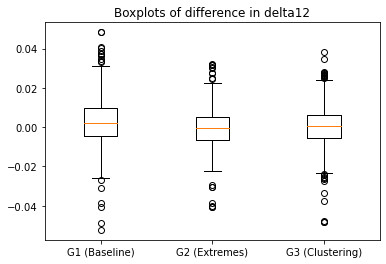

In [22]:
plt.boxplot([g1_diff['diff_delta12'], g2_diff['diff_delta12'], g3_diff['diff_delta12']], labels=['G1 (Baseline)', 'G2 (Extremes)', 'G3 (Clustering)'])
plt.title('Boxplots of difference in delta12')

Text(0.5, 1.0, 'Boxplots of difference in magnitude')

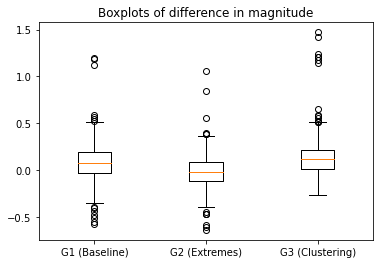

In [23]:
plt.boxplot([g1_diff['diff_magnitude'], g2_diff['diff_magnitude'], g3_diff['diff_magnitude']], labels=['G1 (Baseline)', 'G2 (Extremes)', 'G3 (Clustering)'])
plt.title('Boxplots of difference in magnitude')

## Student's t-test

In [24]:
print(ttest_ind(g1_diff['diff_delta12'], g2_diff['diff_delta12'], alternative='two-sided', usevar='pooled'))
print("\nA Student's t-test indicated that the mean difference in delta12 for Game 2 (-0.000503) differs significantly from the mean difference in delta12 for Game 1 (0.003243) (t=6.9351, df=1555, p=5.9e-12)")

(6.935143458734862, 5.9311318919470565e-12, 1555.0)

A Student's t-test indicated that the mean difference in delta12 for Game 2 (-0.000503) differs significantly from the mean difference in delta12 for Game 1 (0.003243) (t=6.9351, df=1555, p=5.9e-12)


In [25]:
print(ttest_ind(g1_diff['diff_delta12'], g3_diff['diff_delta12'], alternative='two-sided', usevar='pooled'))
print("\nA Student's t-test indicated that the mean difference in delta12 for Game 3 (0.000259) differs significantly from the mean difference in delta12 for Game 1 (0.003243) (t=5.1940, df=1490, p=2.4e-07)")

(5.193951495136213, 2.3434042242390769e-07, 1490.0)

A Student's t-test indicated that the mean difference in delta12 for Game 3 (0.000259) differs significantly from the mean difference in delta12 for Game 1 (0.003243) (t=5.1940, df=1490, p=2.4e-07)


In [26]:
print(ttest_ind(g1_diff['diff_magnitude'], g2_diff['diff_magnitude'], alternative='two-sided', usevar='pooled'))
print("\nA Student's t-test indicated that the mean difference in magnitude for Game 2 (-0.011355) differs significantly from the mean difference in magnitude for Game 1 (0.0.081704) (t=10.6979, df=1555, p=8.0e-26)")

(10.703101055312139, 7.6229682131608e-26, 1555.0)

A Student's t-test indicated that the mean difference in magnitude for Game 2 (-0.011355) differs significantly from the mean difference in magnitude for Game 1 (0.0.081704) (t=10.6979, df=1555, p=8.0e-26)


In [27]:
print(ttest_ind(g1_diff['diff_magnitude'], g3_diff['diff_magnitude'], alternative='two-sided', usevar='pooled'))
print("\nA Student's t-test indicated that the mean difference in magnitude for Game 3 (0.130282) differs significantly from the mean difference in magnitude for Game 1 (0.0.081704) (t=-5.1494, df=1490, p=3.0e-07)")

(-5.146722981294162, 3.003806242642064e-07, 1490.0)

A Student's t-test indicated that the mean difference in magnitude for Game 3 (0.130282) differs significantly from the mean difference in magnitude for Game 1 (0.0.081704) (t=-5.1494, df=1490, p=3.0e-07)


In [28]:
print(ttest_ind(g2_diff['diff_delta12'], g3_diff['diff_delta12'], alternative='two-sided', usevar='pooled'))
print("\nA Student's t-test indicated that the mean difference in delta12 for Game 2 (-0.000503) differs significantly from the mean difference in delta12 for Game 1 (0.003243) (t=6.9351, df=1555, p=5.9e-12)")

(-1.4373433448950157, 0.15083785878622488, 1439.0)

A Student's t-test indicated that the mean difference in delta12 for Game 2 (-0.000503) differs significantly from the mean difference in delta12 for Game 1 (0.003243) (t=6.9351, df=1555, p=5.9e-12)


## ANOVA test

In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

lm = ols('diff_delta12~C(label)' , data=delta_df).fit()
aov_table = anova_lm(lm , typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(label),2.0,0.006112,0.003056,27.175779,2.180200e-12
Residual,2242.0,0.252133,0.000112,NaN,NaN


In [30]:
lm = ols('diff_magnitude~C(label)' , data=magnitude_df).fit()
aov_table = anova_lm(lm , typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(label),2.0,7.548834,3.774417,121.782474,6.179627e-51
Residual,2242.0,69.486544,0.030993,NaN,NaN


Text(0.5, 1.0, 'Residuals vs fitted plot')

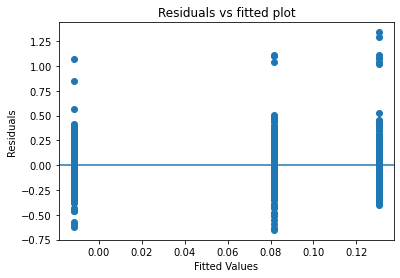

In [31]:
plt.figure()
plt.scatter(lm.fittedvalues,lm.resid)
plt.axhline(y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted plot')
# We want residuals to be largely centered about 0

Text(0.5, 1.0, "Cook's distance plot")

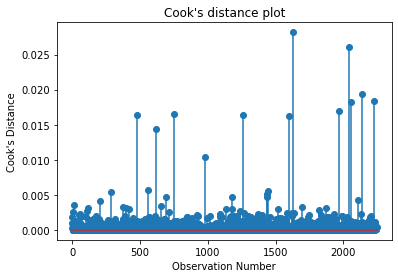

In [32]:
plt.figure()
cooks=lm.get_influence().cooks_distance[0]
plt.stem(range(len(cooks)),cooks)
plt.xlabel('Observation Number')
plt.ylabel("Cook's Distance")
plt.title("Cook's distance plot")

### Tukey's range test

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(delta_df.diff_delta12, delta_df.label)
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    G1     G2  -0.0037  0.001  -0.005 -0.0025   True
    G1     G3   -0.003  0.001 -0.0043 -0.0017   True
    G2     G3   0.0008 0.3617 -0.0005  0.0021  False
----------------------------------------------------


Tukey's range test shows that with delta12, there is a significant difference between Game 1 and Games 2/3, but not a significant difference between Game 2 and 3

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(magnitude_df.diff_magnitude, magnitude_df.label)
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    G1     G2  -0.0931 0.001 -0.114 -0.0722   True
    G1     G3   0.0486 0.001 0.0271    0.07   True
    G2     G3   0.1417 0.001 0.1199  0.1634   True
--------------------------------------------------


Tukey's range test shows that with delta12, there is a significant difference between all the games

# Checking normality

Text(0.5, 1.0, 'G3 delta12')

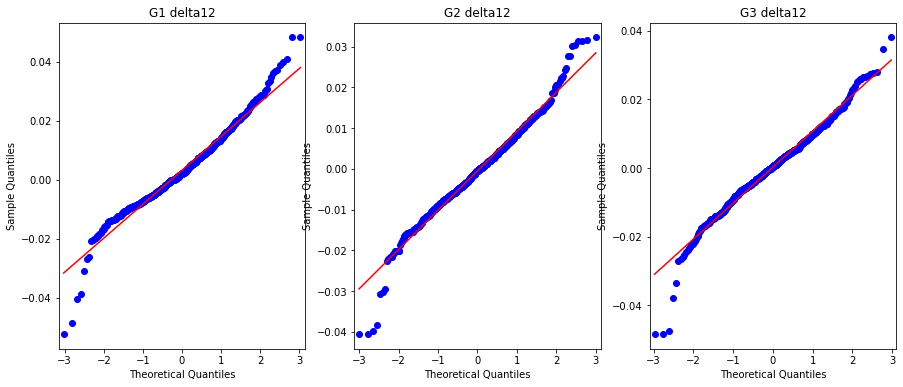

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
x = qqplot(g1_diff['diff_delta12'], line='s', ax=ax1)
ax1.set_title('G1 delta12')
y = qqplot(g2_diff['diff_delta12'], line='s', ax=ax2)
ax2.set_title('G2 delta12')
z = qqplot(g3_diff['diff_delta12'], line='s', ax=ax3)
ax3.set_title('G3 delta12')

Text(0.5, 1.0, 'G3 magnitude')

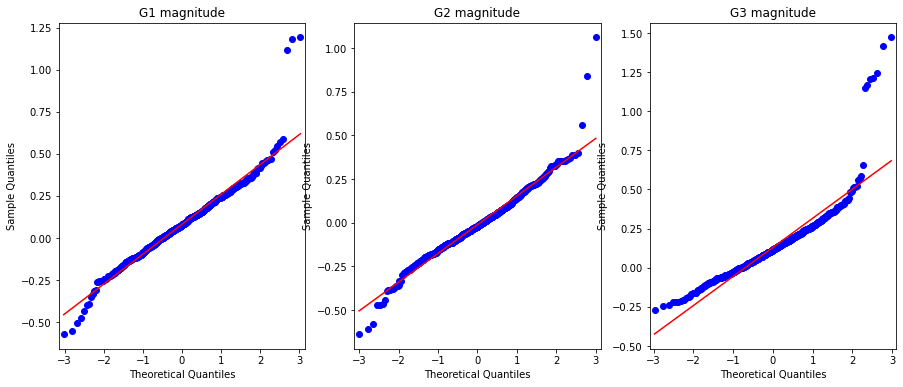

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
x = qqplot(g1_diff['diff_magnitude'], line='s', ax=ax1)
ax1.set_title('G1 magnitude')
y = qqplot(g2_diff['diff_magnitude'], line='s', ax=ax2)
ax2.set_title('G2 magnitude')
z = qqplot(g3_diff['diff_magnitude'], line='s', ax=ax3)
ax3.set_title('G3 magnitude')